### Exercise-3
### Python Program for Linear Discriminant Analysis for Multiclass Classification (Manual).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing, svm, linear_model, decomposition
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
np.set_printoptions(precision=4)

# Input: Dataset 
iris = pd.read_csv('iris.csv', header=None)

# Encode Categorical Class Labels
class_le = LabelEncoder()
Y = class_le.fit_transform(iris[4].values)

# Standardize features
stdsc = StandardScaler()
X = stdsc.fit_transform(iris.iloc[:,range(0,4)].values) 

# Construct within-class covariant scatter matrix S_W
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X[Y==i].T)

# Construct between-class scatter matrix S_B
N=np.bincount(Y)                                         
vecs=[]
[vecs.append(np.mean(X[Y==i],axis=0)) for i in range(3)] # Class Means
mean_overall = np.mean(X, axis=0)                        # Overall Mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1))
                 .dot(((vecs[i]-mean_overall).reshape(1,4))))
    
# Calculate Sorted Eigen Values and Eigen Vectors of  inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) 
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)

# Project original features onto the new feature space
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].
             reshape(4,1))).real
X_lda = X.dot(W)

data=pd.DataFrame(X_lda)
data['class']=Y
data.columns=["LD1","LD2","class"]

# Save the Reduced Dimension Dataset
irisLDA_Manual = pd.concat([data],axis=1)
irisLDA_Manual.to_csv('irisLDA_Manual.csv')

### Exercise-3
### Python Program for Linear Discriminant Analysis for Multiclass Classification (SciKit-Learn).

In [2]:
# Create Linear Discriminant Analysis object
LDA = LinearDiscriminantAnalysis(n_components=2)

# Train the model
X_lda2 = LDA.fit_transform(X, Y)

data2=pd.DataFrame(X_lda2)
data2['class']=Y
data2.columns=["LD1","LD2","class"]

# Save the Reduced Dimension Dataset
irisLDA_SKL = pd.concat([data2],axis=1)
irisLDA_SKL.to_csv('irisLDA_SKL.csv')

### Exercise-3
### Output and Comparison of Both Methods.


ACCURACY METRIC OF THE ORIGINAL DATASET


Shape of Original Dataset : X =  (150, 4)  Y =  (150,)

Accuracy of IRIS Dataset Before LDA 

    Accuracy =  95.55555555555556 % for K-Value = 2
    Accuracy =  93.33333333333333 % for K-Value = 4
    Accuracy =  95.55555555555556 % for K-Value = 6
    Accuracy =  95.55555555555556 % for K-Value = 8
    Accuracy =  95.55555555555556 % for K-Value = 10
    Accuracy =  95.55555555555556 % for K-Value = 12
    Accuracy =  97.77777777777777 % for K-Value = 14
    Accuracy =  95.55555555555556 % for K-Value = 16
    Accuracy =  95.55555555555556 % for K-Value = 18
    Accuracy =  95.55555555555556 % for K-Value = 20
    Accuracy =  93.33333333333333 % for K-Value = 22
    Accuracy =  93.33333333333333 % for K-Value = 24

_______________________________________________________________________


FOR LINEAR DISCRIMINANT ANALYSIS USING MANUAL METHOD


Shape of Reduced Dataset  : X =  (150, 2)  Y =  (150, 1)

Accuracy of IRIS Dataset after LDA

    Acc

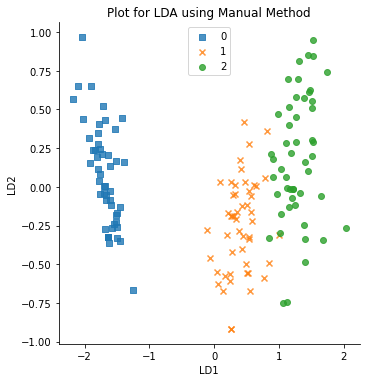


_______________________________________________________________________


FOR LINEAR DISCRIMINANT ANALYSIS USING SCIKIT-LEARN METHOD


Shape of Reduced Dataset  : X =  (150, 2)  Y =  (150, 1)

Accuracy of IRIS Dataset after LDA

    Accuracy =  95.55555555555556 % for K-Value = 2
    Accuracy =  95.55555555555556 % for K-Value = 4
    Accuracy =  97.77777777777777 % for K-Value = 6
    Accuracy =  100.0 % for K-Value = 8
    Accuracy =  100.0 % for K-Value = 10
    Accuracy =  100.0 % for K-Value = 12
    Accuracy =  100.0 % for K-Value = 14
    Accuracy =  100.0 % for K-Value = 16
    Accuracy =  100.0 % for K-Value = 18
    Accuracy =  100.0 % for K-Value = 20
    Accuracy =  100.0 % for K-Value = 22
    Accuracy =  100.0 % for K-Value = 24


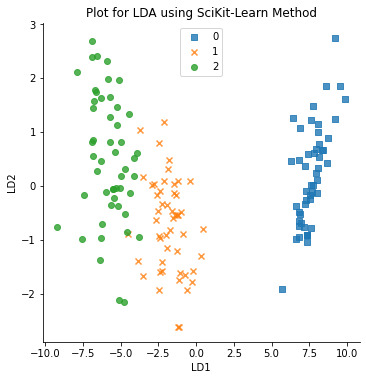

In [3]:
# Metric Calculation for Original Dataset
# Check Accuracy over Original Dataset
print("\nACCURACY METRIC OF THE ORIGINAL DATASET\n")
# Split the Original Dataset into Training and Testing Datasets and 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

# Output: The Shape of the Original Dataset and its Accuracy over KNN Classifier.
print("\nShape of Original Dataset : X = ", X.shape," Y = ", Y.shape)
print('\nAccuracy of IRIS Dataset Before LDA \n')
for K in range(25):
    K_value = K+1
    #Using KNN Classifier to Check Accuracy before LDA
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', 
                                 algorithm='auto')
    neigh.fit(X_train, Y_train) 
    Y_pred = neigh.predict(X_test)
    if(K_value%2 == 0):
        print ("    Accuracy = ", accuracy_score(Y_test,Y_pred)*100,
               "% for K-Value = ",K_value)


# Metric Calculation for Reduced Dataset obtained by LDA using Manual Method
print("\n_______________________________________________________________________\n")
print("\nFOR LINEAR DISCRIMINANT ANALYSIS USING MANUAL METHOD\n")

# Load the Reduced Dataset into Pandas DataFrame
irisldam = pd.read_csv("irisLDA_Manual.csv")

features = ['LD1', 'LD2']
# Separating out the Features
X1 = irisldam.loc[:, features].values
# Separating out the Target
Y1 = irisldam.loc[:,['class']].values

# Check Accuracy over Reduced Dataset
# Split the Original Dataset into Training and Testing Datasets  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split( X1, Y1, test_size = 0.3)
Y_train1 = Y_train1.ravel()
Y_test1 = Y_test1.ravel()

# Output: The Shape of Reduced Dataset, its Plot & its Accuracy over KNN Classifier.
print("\nShape of Reduced Dataset  : X = ", X1.shape," Y = ", Y1.shape)
print('\nAccuracy of IRIS Dataset after LDA\n')
for K in range(25):
    K_value = K+1
    
    # Using KNN Classifier to Check Accuracy after LDA
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', 
                                 algorithm='auto')
    neigh.fit(X_train1, Y_train1) 
    Y_pred1 = neigh.predict(X_test1)
    if(K_value%2 == 0):
        print ("    Accuracy = ", accuracy_score(Y_test1,Y_pred1)*100,
               "% for K-Value =",K_value)

markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data,markers=markers,fit_reg=False,
           hue='class', legend=False)
plt.legend(loc='upper center')
plt.title('Plot for LDA using Manual Method')
plt.show()

# Metric Calculation for Reduced Dataset obtained by LDA using SciKit-Learn Method
print("\n_______________________________________________________________________\n")
print("\nFOR LINEAR DISCRIMINANT ANALYSIS USING SCIKIT-LEARN METHOD\n")
# Load the Reduced Dataset into Pandas DataFrame
irisldas = pd.read_csv("irisLDA_SKL.csv")

features = ['LD1', 'LD2']
# Separating out the Features
X2 = irisldas.loc[:, features].values
# Separating out the Target
Y2 = irisldas.loc[:,['class']].values

# Check Accuracy over Reduced Dataset
# Split the Original Dataset into Training and Testing Datasets  
X_train2, X_test2, Y_train2, Y_test2 = train_test_split( X2, Y2, test_size = 0.3)
Y_train2 = Y_train2.ravel()
Y_test2 = Y_test2.ravel()

# Output: The Shape of Reduced Dataset, its Plot & its Accuracy over KNN Classifier.
print("\nShape of Reduced Dataset  : X = ", X2.shape," Y = ", Y2.shape)
print('\nAccuracy of IRIS Dataset after LDA\n')
for K in range(25):
    K_value = K+1
    
    # Using KNN Classifier to Check Accuracy after LDA
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', 
                                 algorithm='auto')
    neigh.fit(X_train2, Y_train2) 
    Y_pred2 = neigh.predict(X_test2)
    if(K_value%2 == 0):
        print ("    Accuracy = ", accuracy_score(Y_test2,Y_pred2)*100,
               "% for K-Value =",K_value)
        
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data2, markers=markers, fit_reg=False,
           hue='class', legend=False)
plt.legend(loc='upper center')
plt.title('Plot for LDA using SciKit-Learn Method')
plt.show()

##### On comparison, we can see that both the methods (viz. Linear Discriminant Analysis Manually and Linear Discriminant Analysis with SciKit-Learn) reduce the dataset from 4 dimensions to 2 dimensions. 

##### On comparing the Accuracy of a Classifier (here KNN Classifier) we can see that the Reduced Datasets obtained using LDA increases with respect to the Classifier Accuracy over Original Dataset. 

##### The KNN Classifier gives higher accuracy for Dataset reduced by Manual Method over SciKit-Learn Method for smaller values of k, but attains higher accuracy for Dataset reduced by SciKit-Learn Method over Manual Method for larger k values.